# Cross Validation & Calibrating Model Predictions
**contact:** drew.wilimitis@vumc.org

## Import Libraries

In [1]:
# import libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# set matplotlib style and plotting configuration
plt.style.use('seaborn')
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore');

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# # load models for plotting and try new plotting format
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [18]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve, IsotonicRegression, CalibrationDisplay
from sklearn.metrics import brier_score_loss
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=5, method='isotonic')
calibrated_clf.fit(X, y)
len(calibrated_clf.calibrated_classifiers_)
calibrated_clf.predict_proba(X)[:5, :]

CalibratedClassifierCV(base_estimator=GaussianNB(), cv=5, method='isotonic')

5

array([[0.84777778, 0.15222222],
       [0.03421148, 0.96578852],
       [0.14696186, 0.85303814],
       [0.00645161, 0.99354839],
       [0.05909091, 0.94090909]])

array([0.06206897, 0.14851485, 0.22580645, 0.25      , 0.44897959,
       0.61904762, 0.55      , 0.76086957, 0.82258065, 0.97818182])

array([0.05183091, 0.12095186, 0.25099433, 0.35615826, 0.47256917,
       0.54371212, 0.65237273, 0.74844552, 0.84048424, 0.98020965])

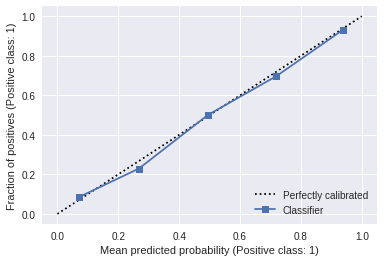

In [19]:
y_pred = calibrated_clf.predict_proba(X)[:, 1]
prob_true, prob_pred = calibration_curve(y_true=y, y_prob=y_pred, n_bins=10)
prob_true
prob_pred
disp = CalibrationDisplay.from_predictions(y, y_pred)
plt.show()

GaussianNB()

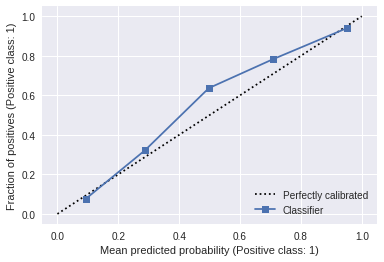

In [20]:
base_clf.fit(X, y)
base_clf_pred = base_clf.predict_proba(X)[:, 1]
disp = CalibrationDisplay.from_predictions(y, base_clf_pred)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

In [13]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
calibrated_clf.fit(X, y)

len(calibrated_clf.calibrated_classifiers_)

calibrated_clf.predict_proba(X)[:5, :]

CalibratedClassifierCV(base_estimator=GaussianNB(), cv=3)

3

array([[0.11009913, 0.88990087],
       [0.07226373, 0.92773627],
       [0.92831861, 0.07168139],
       [0.9283446 , 0.0716554 ],
       [0.07186091, 0.92813909]])

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
X, y = make_classification(n_samples=100, n_features=2,
...                            n_redundant=0, random_state=42)
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
calibrated_clf.fit(X, y)
CalibratedClassifierCV(base_estimator=GaussianNB(), cv=3)
len(calibrated_clf.calibrated_classifiers_)
3
calibrated_clf.predict_proba(X)[:5, :]
array([[0.110..., 0.889...],
       [0.072..., 0.927...],
       [0.928..., 0.071...],
       [0.928..., 0.071...],
       [0.071..., 0.928...]])
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=2,
...                            n_redundant=0, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(
...        X, y, random_state=42
... )
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
GaussianNB()
calibrated_clf = CalibratedClassifierCV(
...     base_estimator=base_clf,
...     cv="prefit"
... )
calibrated_clf.fit(X_calib, y_calib)
CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')
len(calibrated_clf.calibrated_classifiers_)
1
calibrated_clf.predict_proba([[-0.5, 0.5]])

In [14]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(
       X, y, random_state=42
)
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)

calibrated_clf = CalibratedClassifierCV(
    base_estimator=base_clf,
    cv="prefit"
)
calibrated_clf.fit(X_calib, y_calib)

len(calibrated_clf.calibrated_classifiers_)

calibrated_clf.predict_proba([[-0.5, 0.5]])

GaussianNB()

CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')

1

array([[0.93677315, 0.06322685]])

In [19]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=2,
                            n_redundant=0, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X, y, random_state=42)
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv="prefit", ensemble=True)
calibrated_clf.fit(X_calib, y_calib)
CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')
len()
calibrated_clf.predict_proba([[-0.5, 0.5]])

GaussianNB()

GaussianNB()

CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')

CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')

1

array([[0.93677315, 0.06322685]])

In [21]:
#xcalibrated_clf.calibrated_classifiers_
?CalibrationDisplay

## Load Data